# DBSCAN Clustering mit Python
### Präsentation von Ellen Kistner und Lais Lemke

In diesem Jupyter Notebook zeigen wir, wie der DBSCAN-Algorithmus verwendet wird, um Cluster in einem Datensatz zu identifizieren. 
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN steht für *Density-Based Spatial Clustering of Applications with Noise* und ist eine beliebte Methode, um Cluster zu finden. 

## Originärer Einsatzbereich
DBSCAN wurde ursprünglich für die Analyse von räumlichen (geografischen) Datenbanken entwickelt. Das Ziel war es, Cluster in großen, räumlichen Datensätzen zu identifizieren, insbesondere solche, die nicht kugelförmig sind, sowie "Rauschen" (Noise) in den Daten zu erkennen.

## Funktionsweise und Kernidee
Die Kernidee von DBSCAN besteht darin, Cluster als dichte Regionen von Datenpunkten in einem Datensatz zu identifizieren und Punkte außerhalb dieser dichten Regionen als Rauschen (Noise) zu klassifizieren. DBSCAN clustert die Daten häufig auf eine Weise, die der menschlichen Intuition entspricht, indem es Gruppen von dicht beieinanderliegenden Punkten zu Clustern zusammenfasst und isolierte Punkte als Ausreißer behandelt. Anstatt eine bestimmte Anzahl von Clustern vorzugeben oder nur kugelförmige Cluster zu erkennen, sucht DBSCAN nach natürlichen Gruppierungen von Punkten, basierend auf ihrer Dichte und ihrer Nähe zueinander.

### Wichtige Begriffe:
1. **Nachbarschaftsprüfung:** Für jeden Punkt im Datensatz wird geprüft, wie viele Nachbarn er in einem Umkreis von `eps` hat (Nachbarschaftsbereich).
2. **Kernpunkte:** Punkte, die mindestens `min_samples` Nachbarn in ihrer `eps`-Nachbarschaft haben, werden als **Kernpunkte** definiert. Diese Punkte sind potenzielle Zentren von Clustern.
3. **Randpunkte:** Punkte, die weniger als `min_samples` Nachbarn haben, aber sich innerhalb der `eps`-Umgebung eines Kernpunkts befinden, werden als **Randpunkte** klassifiziert.
4. **Rauschen (Noise):** Punkte, die weder Kernpunkte noch Randpunkte sind, werden als **Rauschen** oder **Outliers** betrachtet
5. **Cluster-Bildung:** Cluster entstehen, wenn Kernpunkte direkt oder indirekt miteinander verbunden sind, d.h., wenn sie über andere Kernpunkte erreichbar sind.


## Vorteile
- **Keine Vorgabe der Clusteranzahl nötig:** Im Gegensatz zu anderen Clustering-Algorithmen wie K-Means muss die Anzahl der Cluster nicht im Voraus angegeben werden.
- **Erkennung von Clustern beliebiger Form:** DBSCAN kann Cluster von beliebiger Form und Dichte erkennen, da es nicht auf kugelförmige Cluster beschränkt ist.
- **Outlier-Erkennung:** DBSCAN identifiziert automatisch Ausreißer oder Rauschen, die nicht zu Clustern gehören.
- **Skalierbarkeit:** Der Algorithmus ist effizient für große Datensätze und funktioniert gut in großen räumlichen Datenbanken.

## Nachteile
- **Wahl der Parameter:** Die Wahl der Parameter `eps` und `min_samples` ist entscheidend und kann je nach Datensatz schwierig sein.
- **Probleme bei variierenden Dichten:** DBSCAN funktioniert nicht gut, wenn die Dichte der Cluster stark variiert, da für alle Cluster dieselben Parameter verwendet werden.
- **Speicheranforderungen:** Der Algorithmus kann für sehr große Datensätze speicherintensiv sein, insbesondere wenn der Datensatz nicht effizient gespeichert oder verarbeitet wird.


## Wichtige Parameter
- `eps` (`epsilon`): Maximale Entfernung, die zwei Punkte voneinander haben dürfen, um als Nachbarn zu gelten, kann als Radium um einen Punkt gesehen werden. Alle Punkte, die in diesem Radius sind, sind Nachbarn. 
- `min_samples`: Minimale Anzahl von Punkten (Nachbarn) in einem Umkreis von `eps`, die notwendig ist, um einen Cluster zu bilden.

## DBSCAN sckit-learn Dokumentation
https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.DBSCAN.html

## Datengenerierung
#### Teil 1: Datengenerierung und Ausgabe des Datensatzes

Wir verwenden den `make_moons` Datensatz aus der `sklearn`-Bibliothek, der zwei halbmondförmige Cluster erzeugt. Dies eignet sich gut, um zu zeigen, wie DBSCAN mit Clustern arbeitet. Augenscheinlich kann man in diesem Datensatz zwei Halbmonde erkennen diese sollen nun auch als solche geclustert werden. 

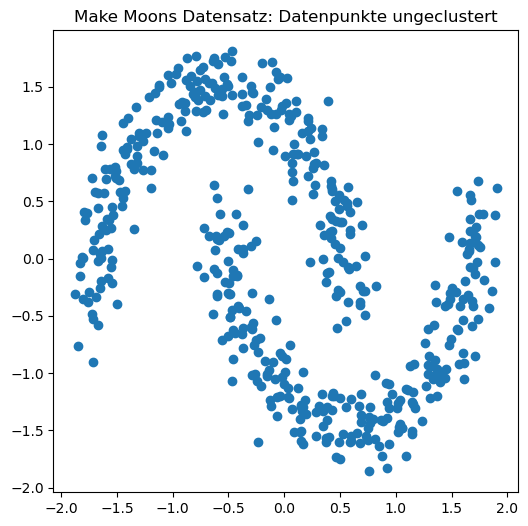

In [32]:
# Zuerst importieren wir die benötigten Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Jetzt setzen wir einen festen Zufallsseed, damit unsere Ergebnisse reproduzierbar sind
random_state = 52
np.random.seed(random_state)

# ---------------------------------------------
# Teil 1: Datengenerierung und Ausgabe des Datensatzes
# ---------------------------------------------

# Wir generieren unseren Datensatz "Make Moons" mit Rauschen
# Dabei legen wir fest:
# - n_samples=500: Wir erzeugen 500 Datenpunkte
# - noise=0.1: Wir fügen Rauschen hinzu, um die Daten realistischer zu gestalten
# - random_state=42: Wir setzen den Zufallsseed für Reproduzierbarkeit
X, _ = make_moons(n_samples=500, noise=0.1, random_state=random_state)

# Als Nächstes standardisieren wir die Daten
# Das bedeutet, wir zentrieren die Daten um den Mittelwert und skalieren sie auf eine Standardabweichung von 1
X = StandardScaler().fit_transform(X)

# Jetzt plotten wir den generierten Datensatz, um einen ersten Eindruck zu bekommen
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Make Moons Datensatz: Datenpunkte ungeclustert")
plt.show()


## DBSCAN Clustering
#### Teil 2: Anwendung des DBSCAN-Algorithmus und Plotten der Ergebnisse

Nun wenden wir den DBSCAN-Algorithmus auf den Datensatz an.
Wir wählen den Radius um jeden Datenpunkt `eps=0.2` und als Mindestanzahl von Datenpunkten in diesem Radius `min_samples=7`.


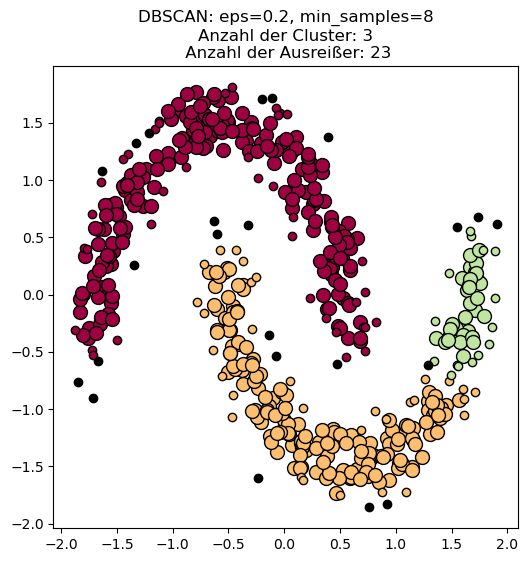

In [33]:
# ---------------------------------------------
# Teil 2: Anwendung des DBSCAN-Algorithmus und Plotten der Ergebnisse
# ---------------------------------------------

# Jetzt legen wir initiale Werte für eps (float) und min_samples (int) fest
eps_value = 0.2
min_samples_value = 8

# Jetzt importieren wir den DBSCAN-Algorithmus
from sklearn.cluster import DBSCAN


# Wir definieren eine Funktion, die den DBSCAN-Algorithmus auf unseren Datensatz anwendet
def perform_dbscan(X, eps, min_samples):
    """
    Führt den DBSCAN-Algorithmus auf den Datensatz X mit den gegebenen Parametern aus.
    """
    # Wir erstellen ein DBSCAN-Modell mit den Parametern eps und min_samples
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Jetzt passen wir das Modell an unsere Daten an und erhalten die Labels für jeden Datenpunkt
    labels = dbscan.fit_predict(X)

    # Wir erstellen eine Maske, die anzeigt, welche Punkte Kernpunkte sind
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True

    # Wir berechnen die Anzahl der erkannten Cluster, indem wir die eindeutigen Labels zählen
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # Schließlich geben wir die Labels, die Kernpunkt-Maske und die Anzahl der Cluster zurück
    return labels, core_samples_mask, n_clusters


# Wir definieren eine Funktion, um die Cluster-Ergebnisse zu visualisieren
def plot_clusters(X, labels, core_samples_mask, n_clusters, eps, min_samples):
    """
    Visualisiert die Cluster-Ergebnisse des DBSCAN-Algorithmus.
    """
    # Zuerst sammeln wir alle einzigartigen Cluster-Labels (einschließlich -1 für Ausreißer)
    unique_labels = set(labels)

    # Wir erstellen eine Farbpalette, um jedem Cluster eine eigene Farbe zuzuweisen
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    # Wir erstellen eine neue Figur für unser Plot
    plt.figure(figsize=(6, 6))

    # Jetzt iterieren wir über jedes Cluster und zeichnen die Punkte
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Wenn das Label -1 ist, handelt es sich um Ausreißer, die wir schwarz darstellen
            col = 'k'

        # Wir erstellen eine Maske für die Punkte, die zum aktuellen Cluster gehören
        class_member_mask = (labels == k)

        # Wir zeichnen die Kernpunkte des Clusters mit größeren Markern
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=10)

        # Wir zeichnen die Randpunkte des Clusters mit kleineren Markern
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=6)

    # Wir fügen dem Plot einen Titel hinzu, der die verwendeten Parameter und die Anzahl der Cluster anzeigt
    plt.title(
        f'DBSCAN: eps={eps}, min_samples={min_samples}\nAnzahl der Cluster: {n_clusters}\n Anzahl der Ausreißer: {np.sum(labels == -1)}')
    plt.show()


# Wir führen den DBSCAN-Algorithmus mit den initialen Parametern aus
labels, core_samples_mask, n_clusters = perform_dbscan(X, eps_value, min_samples_value)

# Anschließend plotten wir die Ergebnisse
plot_clusters(X, labels, core_samples_mask, n_clusters, eps_value, min_samples_value)



## Visualisierung der Ergebnisse

In der oberen Grafik sind Punkte, die zu einem Cluster gehören, farblich markiert. Punkte, die keine Nachbarn haben (also Rauschen oder "Noise" sind), werden in schwarz bzw. im Dark Modus in weiß dargestellt. Aktuell wird der obere Mond noch nicht als ganzer Mond erkannt, dies liegt an den gewählten Parametern.

Durch Anpassung von `eps` und `min_samples` können unterschiedliche Clustermuster erzeugt werden. Dies ist in der nächsten Funktion gut einzusehen. Der Wert `eps` verändert den Radius um jeden Punkt und bestimmt, wie weit zwei Punkte voneinander entfernt sein dürfen, um als Teil desselben Clusters zu gelten. Der Wert `min_samples` bestimmt die Mindestanzahl von Punkten, die in einem Cluster vorhanden sein müssen. 


---

## Veränderungen durch `eps`:

### Kleiner `eps`-Wert:
- **Nur nahegelegene Punkte** werden als Nachbarn betrachtet.

#### Effekt:
- Es entstehen **viele kleine Cluster** oder sogar **keine Cluster**.
- Punkte, die in Wahrheit zu einem Cluster gehören, könnten **als Ausreißer klassifiziert** werden.
- Kann zu einer **niedrigeren Genauigkeit** führen, wenn echte Cluster zerteilt werden.

### Großer `eps`-Wert:
- **Mehr Punkte** werden als Nachbarn betrachtet, auch wenn sie weiter voneinander entfernt sind.

#### Effekt:
- Cluster können **zu groß werden** oder sich **überschneiden**.
- Punkte, die eigentlich Ausreißer sind, könnten **fälschlicherweise zu einem Cluster hinzugefügt** werden.
- Kann ebenfalls die **Genauigkeit senken**, da Cluster unpräzise werden.

---

## Veränderungen durch `min_samples`:

### Kleiner `min_samples`-Wert:
- Cluster können aus **wenigen Punkten bestehen**.

#### Effekt:
- Es entstehen **viele kleine Cluster**.
- **Rauschen (Ausreißer)** wird fälschlicherweise als Cluster erkannt.
- Kann die **Genauigkeit verschlechtern**, da echte Cluster nicht gut repräsentiert werden.

### Großer `min_samples`-Wert:
- **Mehr Punkte** sind erforderlich, um einen Cluster zu bilden.

#### Effekt:
- **Kleine oder spärliche Cluster** werden ignoriert oder **als Ausreißer klassifiziert**.
- Kann zu einer **höheren Präzision** führen, da nur dichte Cluster erkannt werden.
- Gleichzeitig können echte Cluster mit wenigen Punkten **übersehen werden**, was die **Vollständigkeit** senkt.

---

## Wechselwirkung von `eps` und `min_samples`:

### Kleine `eps` und große `min_samples`:
- **Strenge Clusterbildung**: Nur dichte und kompakte Cluster werden erkannt.

#### Effekt:
- Kann zu **hoher Präzision**, aber **niedrigem Recall** führen.

### Große `eps` und kleine `min_samples`:
- **Tolerantere Clusterbildung**: Viele Datenpunkte werden zu Clustern zusammengefasst.

#### Effekt:
- Kann zu **höherem Recall**, aber **niedriger Präzision** führen.


---

Um den Einfluss der Wahl der beiden Parameter zu visualisieren haben wir eine interaktive Funktion erstellt, die es ermöglicht, den `eps`- und `min_samples`-Wert zu ändern und die Auswirkungen auf die Clusterbildung zu beobachten:

### Teil 3: Interaktive Visualisierung mit Schiebereglern



In [34]:
# ---------------------------------------------
# Teil 3: Interaktive Visualisierung mit Schiebereglern
# ---------------------------------------------

# Wir importieren die Bibliotheken für interaktive Widgets
import ipywidgets as widgets
from IPython.display import display


# Wir definieren eine Funktion, die die Auswirkungen von eps und min_samples auf das Clustering visualisiert
def plot_dbscan_interactive(eps, min_samples):
    """
    Visualisiert die Auswirkungen der Parameter eps und min_samples auf die Clusterbildung.
    """
    # Wir führen den DBSCAN-Algorithmus (aus Teil 2) mit den aktuellen Werten der Schieberegler aus
    labels, core_samples_mask, n_clusters = perform_dbscan(X, eps, min_samples)

    # Jetzt plotten wir die Ergebnisse
    plot_clusters(X, labels, core_samples_mask, n_clusters, eps, min_samples)


# Wir erstellen interaktive Schieberegler für eps und min_samples
# Mit diesen können wir die Parameter dynamisch anpassen und das Ergebnis sofort sehen
eps_slider = widgets.FloatSlider(value=0.2, min=0.05, max=0.5, step=0.05, description='eps')
min_samples_slider = widgets.IntSlider(value=8, min=1, max=30, step=1, description='min_samples')

# Wir ordnen die Schieberegler nebeneinander an
ui = widgets.HBox([eps_slider, min_samples_slider])

# Wir verbinden die Schieberegler mit unserer plot_dbscan_interactive-Funktion
out = widgets.interactive_output(plot_dbscan_interactive, {'eps': eps_slider, 'min_samples': min_samples_slider})

# Zum Schluss zeigen wir die Schieberegler und das Diagramm an
display(ui, out)


Output()

### Beispiele
##### Ziel: 2 Cluster, eins pro Halbmond und so wenig Ausreißer wie möglich 
##### Beispiele die ihr ausprobieren könnt: 

| Ausgangswert  | kleines min_sample                                                                                                    | mittelgroßes min_sample                                                                                                                                  | großes min_sample                                                                                                                                                                                                                                                                        |
|---------------|-----------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| kleines eps   | eps = 0.1, min_samples = 5 -> 28 Cluster, Anzahl Ausreißer 242; Problem hier: zu viele Cluster, da `eps` zu klein ist | eps = 0.1, min_samples = 8 -> 3 Cluster; viele kleine Cluster und Ausreißer, weil in einem kleinen `eps` (Radius) viele `min_samples` sein müssen        | eps = 0.1, min_samples = 15 -> 0 Cluster; Problem: in einem kleinen `eps` (Radius) sind keine 15 `min_samples`                                                                                                                                                                           |
|   
| mittleres eps | eps = 0.2 min_samples = 5 -> 2 Cluster, 10 Ausreißer --> Ziel erreicht                                                | eps = 0.2, min_samples = 8 -> 2 Cluster --> Ziel erreicht, 26 Ausreißer also mehr als bei dem kleinen min_sample, trotz selber Cluster Anzahl schlechter | eps = 0.2, min_samples = 15 -> 9 Cluster, 149 Ausreißer; Problem: zu viele Cluster durch zu großes `min_samples`                                                                                                                                                                         |
| großes eps    | eps = 0.51, min_samples = 5 -> 1 Cluster; Problem hier: zu wenig Cluster, da `eps` zu groß ist                        | eps = 0.51, min_samples = 15 -> 1 Cluster; Problem: alle Punkte in einem Cluster `eps` und `min_samples` zu groß                                         | eps = 0.5, min_samples = 15 -> 1 Cluster, 0 Ausreißer                                                                                                                                                                                                                                    | 
| Zusatz        |                                                                                                                       |                                                                                                                                                          | eps = 0.5, min_samples = 30 -> 2 Cluster, 1 Ausreißer --> bisher bestes Ergebnis mit wenigen Ausreißern, weil der Radius `eps` zwar groß ist, aber die geforderte Anzahl an `min_samples` ist ebenfalls hoch und für den Datensatz mit der Dichte sind die beiden Parameter gut geeignet |








### Teil 4: Bestimmung optimaler Parameter für DBSCAN
#### Schritt 1: Erstellung des k-Distanzdiagramms


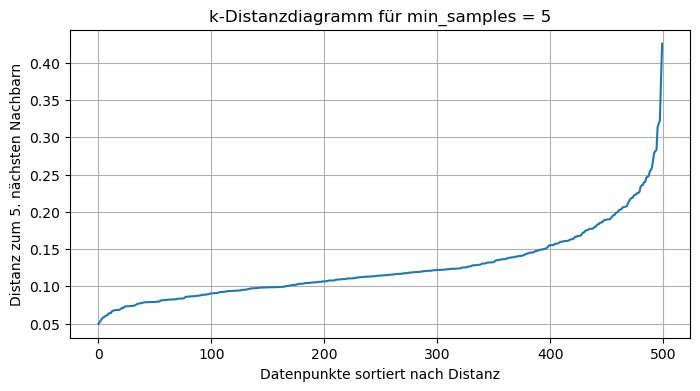

In [35]:
# ---------------------------------------------
# Teil 4: Bestimmung optimaler Parameter für DBSCAN
# ---------------------------------------------

# Jetzt möchten wir Funktionen hinzufügen, um optimale Werte für `eps` und `min_samples` für unseren Datensatz zu finden.

# Zuerst importieren wir die notwendigen Bibliotheken
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")  # Unterdrückt Warnungen für bessere Lesbarkeit

# ---------------------------------------------
# Schritt 1: Erstellung des k-Distanzdiagramms
# ---------------------------------------------

# Wir definieren eine Funktion, um das k-Distanzdiagramm zu erstellen
def plot_k_distance(X, min_samples):
    """
    Erstellt das k-Distanzdiagramm, um einen geeigneten `eps`-Wert zu bestimmen.
    """
    # Wir erstellen ein NearestNeighbors-Modell mit n_neighbors = min_samples
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(X)
    
    # Jetzt berechnen wir die Distanzen zu den min_samples-ten nächsten Nachbarn
    distances, indices = neighbors_fit.kneighbors(X)
    
    # Wir sortieren die Distanzen aufsteigend
    distances = np.sort(distances[:, min_samples-1])
    
    # Nun plotten wir die sortierten Distanzen
    plt.figure(figsize=(8, 4))
    plt.plot(distances)
    plt.title(f'k-Distanzdiagramm für min_samples = {min_samples}')
    plt.xlabel('Datenpunkte sortiert nach Distanz')
    plt.ylabel(f'Distanz zum {min_samples}. nächsten Nachbarn')
    plt.grid(True)
    plt.show()

# Jetzt verwenden wir die Funktion, um das k-Distanzdiagramm zu erstellen
# Wir wählen einen min_samples-Wert, z.B. 5
min_samples_value = 5

# Wir rufen die Funktion auf, um das Diagramm zu erstellen
plot_k_distance(X, min_samples_value)


Im k-Distanzdiagramm sehen wir die sortierten Distanzen zu den min_samples-ten nächsten Nachbarn.
Wir suchen nach einem Knick oder einem starken Anstieg in der Kurve.
Der Wert der Distanz an dieser Stelle ist ein guter Kandidat für `eps`.
In unserem Diagramm könnten wir z.B. einen Knick bei einer Distanz von etwa 0.3 beobachten.
Daher könnten wir `eps = 0.3` als Startwert wählen.

---
#### Schritt 2: Berechnung des Silhouettenkoeffizienten




In [36]:
# ---------------------------------------------
# Schritt 2: Berechnung des Silhouettenkoeffizienten
# ---------------------------------------------

# Wir definieren eine Funktion, um den Silhouettenkoeffizienten zu berechnen
def calculate_silhouette(X, labels):
    """
    Berechnet den Silhouettenkoeffizienten für das gegebene Clustering.
    """
    # Prüfen, ob mehr als ein Cluster vorhanden ist
    if len(set(labels)) > 1 and len(set(labels)) < len(X):
        score = silhouette_score(X, labels)
        return score
    else:
        # Wenn es nur einen Cluster oder nur Ausreißer gibt, ist der Silhouettenkoeffizient nicht definiert
        return -1

# Jetzt führen wir den DBSCAN-Algorithmus mit dem ermittelten eps-Wert aus
eps_value = 0.3
min_samples_value = 5

# Wir verwenden die bereits definierte Funktion perform_dbscan
labels, core_samples_mask, n_clusters = perform_dbscan(X, eps_value, min_samples_value)

# Wir berechnen den Silhouettenkoeffizienten für das Clustering-Ergebnis
sil_score = calculate_silhouette(X, labels)
print(f'Silhouettenkoeffizient für eps = {eps_value} und min_samples = {min_samples_value}: {sil_score:.2f}')


Silhouettenkoeffizient für eps = 0.3 und min_samples = 5: 0.27


Der Silhouettenkoeffizient gibt an, wie gut die Daten in Cluster gruppiert sind.
Ein Wert nahe 1 bedeutet, dass die Daten gut gruppiert sind.
Ein Wert nahe -1 weist auf falsch zugeordnete Punkte hin.
In unserem Fall erhalten wir einen Wert von z.B. 0.3, was auf eine moderate Clusterqualität hinweist.
---
#### Schritt 3: Grid Search zur Parameteroptimierung

In [37]:
# ---------------------------------------------
# Schritt 3: Grid Search zur Parameteroptimierung
# ---------------------------------------------

# Jetzt möchten wir verschiedene Kombinationen von `eps` und `min_samples` ausprobieren, um die besten Parameter zu finden.

# Wir definieren Bereiche für eps und min_samples
eps_range = np.arange(0.1, 0.6, 0.05)
min_samples_range = range(3, 10)

# Wir erstellen Variablen, um die besten Ergebnisse zu speichern
best_score = -1
best_eps = None
best_min_samples = None

# Jetzt iterieren wir über alle Kombinationen von eps und min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        # Wir führen DBSCAN mit den aktuellen Parametern aus
        labels, _, _ = perform_dbscan(X, eps, min_samples)
        
        # Wir berechnen den Silhouettenkoeffizienten
        score = calculate_silhouette(X, labels)
        
        # Wenn der Silhouettenkoeffizient besser ist, speichern wir die Parameter
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

# Wir geben die besten gefundenen Parameter aus
print("Beste Parameterkombination:")
print(f"eps = {best_eps}")
print(f"min_samples = {best_min_samples}")
print(f"Silhouettenkoeffizient = {best_score:.2f}")


Beste Parameterkombination:
eps = 0.30000000000000004
min_samples = 3
Silhouettenkoeffizient = 0.38


Durch die systematische Suche über verschiedene Werte von `eps` und `min_samples` haben wir die Kombination gefunden,
die den höchsten Silhouettenkoeffizienten liefert.
Dies bedeutet, dass die Cluster mit diesen Parametern am besten definiert sind.
Jetzt können wir diese Parameter verwenden, um unseren DBSCAN-Algorithmus auszuführen.
---
#### Schritt 4: Anwendung der optimalen Parameter und Visualisierung

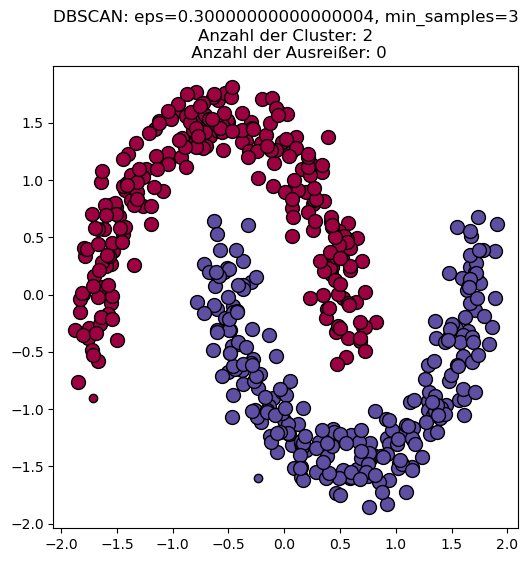

Silhouettenkoeffizient mit optimalen Parametern: 0.38


In [38]:
# ---------------------------------------------
# Schritt 4: Anwendung der optimalen Parameter und Visualisierung
# ---------------------------------------------

# Wir verwenden die besten gefundenen Parameter
eps_value = best_eps
min_samples_value = best_min_samples

# Wir führen den DBSCAN-Algorithmus erneut mit den optimalen Parametern aus
labels, core_samples_mask, n_clusters = perform_dbscan(X, eps_value, min_samples_value)

# Wir plotten die Ergebnisse mit den optimalen Parametern
plot_clusters(X, labels, core_samples_mask, n_clusters, eps_value, min_samples_value)

# Wir geben den Silhouettenkoeffizienten erneut aus
sil_score = calculate_silhouette(X, labels)
print(f'Silhouettenkoeffizient mit optimalen Parametern: {sil_score:.2f}')



Im obigen Plot sehen wir das Clustering-Ergebnis mit den optimalen Parametern.
Die Datenpunkte sind nun möglicherweise besser in Cluster gruppiert.
Der Silhouettenkoeffizient bestätigt die Qualität des Clustering-Ergebnisses.
---
#### Schritt 5: Integration in die interaktive Visualisierung (mit Silhouettenkoeffizienten) 

In [39]:
# ---------------------------------------------
# Schritt 5: Integration in die interaktive Visualisierung
# ---------------------------------------------

# Jetzt erweitern wir unsere interaktive Funktion, um den Silhouettenkoeffizienten anzuzeigen
def plot_dbscan_interactive(eps, min_samples):
    """
    Visualisiert die Auswirkungen der Parameter eps und min_samples auf die Clusterbildung.
    Zeigt zusätzlich den Silhouettenkoeffizienten an.
    """
    # Wir führen den DBSCAN-Algorithmus aus
    labels, core_samples_mask, n_clusters = perform_dbscan(X, eps, min_samples)
    
    # Jetzt plotten wir die Ergebnisse
    plot_clusters(X, labels, core_samples_mask, n_clusters, eps, min_samples)
    
    # Wir berechnen den Silhouettenkoeffizienten
    sil_score = calculate_silhouette(X, labels)
    
    # Wir geben den Silhouettenkoeffizienten aus
    print(f'Silhouettenkoeffizient: {sil_score:.2f}')

# Die Schieberegler bleiben gleich
eps_slider = widgets.FloatSlider(value=eps_value, min=0.1, max=0.6, step=0.05, description='eps')
min_samples_slider = widgets.IntSlider(value=min_samples_value, min=3, max=10, step=1, description='min_samples')

# Wir ordnen die Schieberegler nebeneinander an
ui = widgets.HBox([eps_slider, min_samples_slider])

# Wir verbinden die Schieberegler mit unserer erweiterten plot_dbscan_interactive-Funktion
out = widgets.interactive_output(plot_dbscan_interactive, {'eps': eps_slider, 'min_samples': min_samples_slider})

# Zum Schluss zeigen wir die Schieberegler und das Diagramm an
display(ui, out)


Output()


Mit der erweiterten interaktiven Funktion können wir nun interaktiv die Parameter anpassen
und sehen dabei nicht nur das Clustering-Ergebnis, sondern auch den Silhouettenkoeffizienten.
Dies hilft uns, die Qualität des Clustering in Echtzeit zu bewerten und optimale Parameter zu finden.